In [117]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [118]:
df = pd.read_csv('../DATA/UK_foods.csv',index_col='Unnamed: 0')

In [119]:
df

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [120]:
df.transpose()

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


<AxesSubplot:>

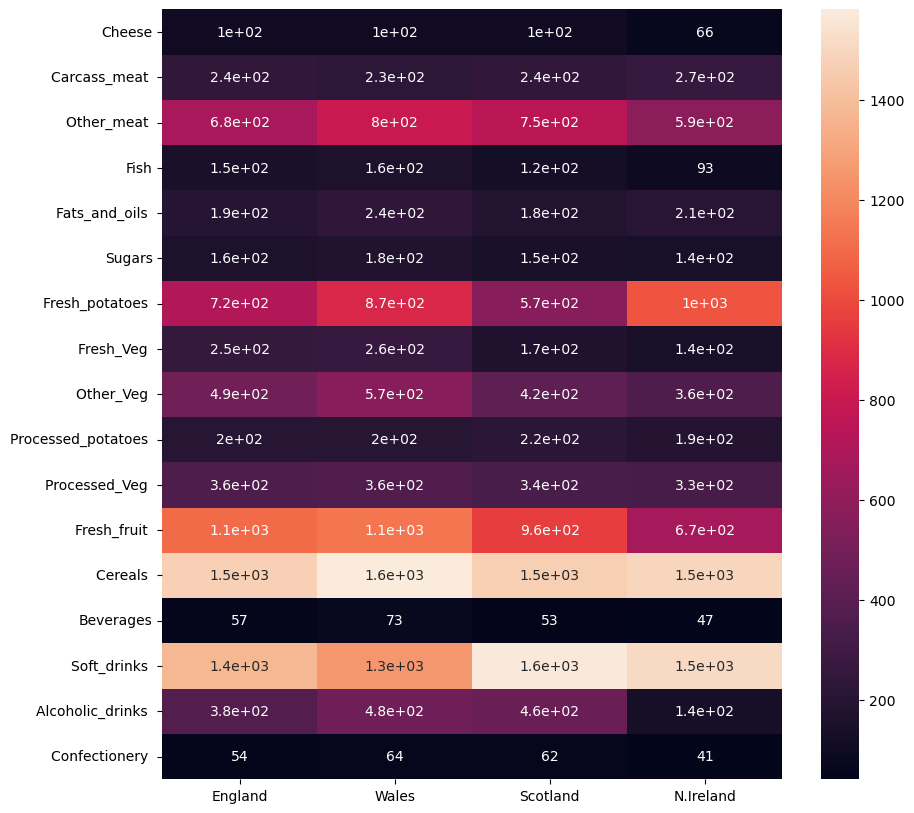

In [121]:
plt.figure(figsize=(10,10))
sns.heatmap(df,annot=True)

In [122]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [123]:
encoder= Sequential()

encoder.add(Dense(8,activation='relu',input_shape=[17]))
encoder.add(Dense(4,activation='relu'))
encoder.add(Dense(2,activation='relu'))

In [124]:
decoder= Sequential()

decoder.add(Dense(4,activation='relu',input_shape=[2]))
decoder.add(Dense(8,activation='relu'))
decoder.add(Dense(17,activation='relu'))

In [125]:
autoencoder= Sequential([encoder,decoder])

In [126]:
autoencoder.compile(loss='mse',optimizer=SGD(learning_rate=1.5))

In [127]:
from sklearn.preprocessing import MinMaxScaler

In [128]:
scaler= MinMaxScaler()

In [129]:
scaled_df= scaler.fit_transform(df.transpose().values)

In [130]:
scaled_df

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

In [131]:
autoencoder.fit(scaled_df,scaled_df,epochs=15)

Epoch 1/15
1/1 [==============================] - 1s 663ms/step - loss: 0.4251
Epoch 2/15
1/1 [==============================] - 0s 8ms/step - loss: 0.3526
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.3141
Epoch 4/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2962
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2900
Epoch 6/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2862
Epoch 7/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2834
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2810
Epoch 9/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2791
Epoch 10/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2775
Epoch 11/15
1/1 [==============================] - 0s 8ms/step - loss: 0.2764
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2756
Epoch 13/15
1/1 [==============================] - 0s 8ms/step - loss: 

In [132]:
encoded_2dim= encoder.predict(scaled_df)

1/1 [==============================] - 0s 62ms/step


In [133]:
encoded_2dim

array([[0.11747851, 1.2827069 ],
       [0.4226141 , 2.2097697 ],
       [0.09560462, 0.83692294],
       [0.        , 0.        ]], dtype=float32)

In [134]:
df.transpose().index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [135]:
results= pd.DataFrame(data=encoded_2dim,index=df.transpose().index,columns=['C1','C2'])

In [136]:
results= results.reset_index()

In [137]:
results

,index,C1,C2
0,England,0.117479,1.282707
1,Wales,0.422614,2.209770
2,Scotland,0.095605,0.836923
3,N.Ireland,0.000000,0.000000


<AxesSubplot:xlabel='C1', ylabel='C2'>

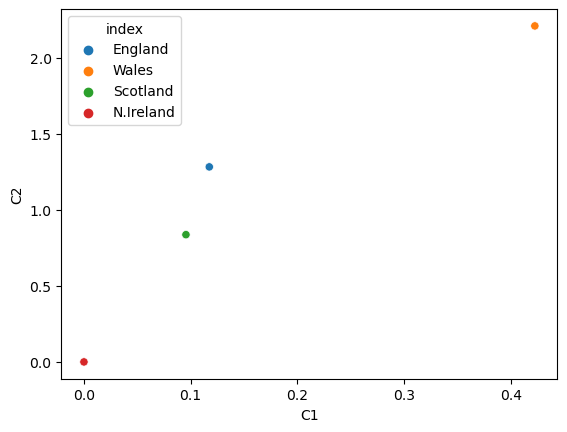

In [138]:
sns.scatterplot(x='C1',y='C2',data=results,hue='index')